In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target 

In [3]:
# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
print(X_scaled.shape, y.shape)

(150, 4) (150,)


# Isolation Forest

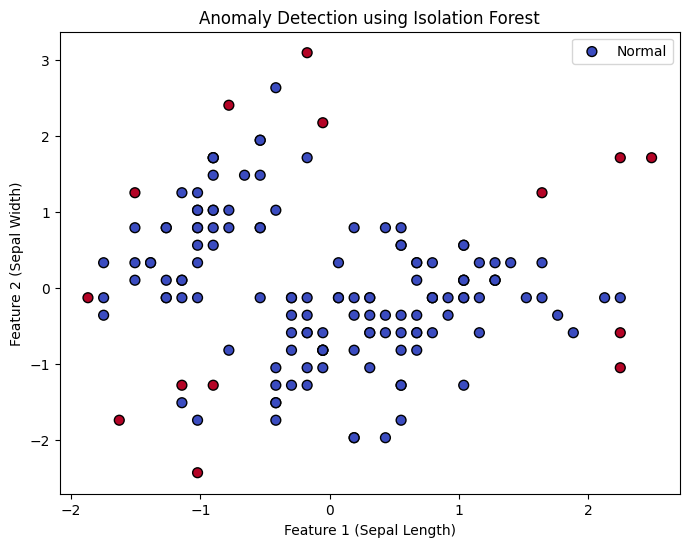

In [9]:
# Fit an Isolation Forest model
iso_forest = IsolationForest(contamination=0.1)  # Set contamination to 10%

y_pred_iso = iso_forest.fit_predict(X_scaled) # 1 for normal, -1 for anomalous
y_pred_iso = np.where(y_pred_iso == 1, 0, 1)  # 1 for anomalies, 0 for normal

# Plot the result of Isolation Forest
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred_iso, cmap='coolwarm', edgecolors='k', s=50)
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Feature 1 (Sepal Length)")
plt.ylabel("Feature 2 (Sepal Width)")
plt.legend(["Normal", "Anomaly"], loc="upper right")
plt.show()

In [20]:
print(f"'Isolation forest' detected {sum(y_pred_iso)} anomalies")

'Isolation forest' detected 15 anomalies


# OneClass SVM

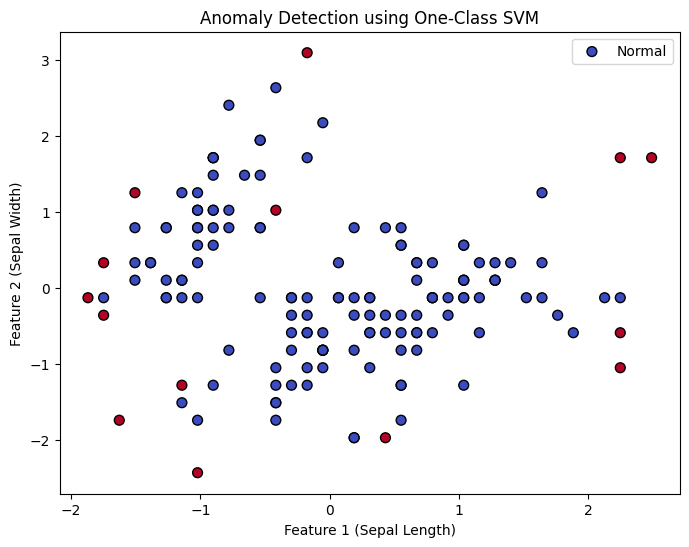

In [10]:
# Fit a One-Class SVM model
oc_svm = OneClassSVM(nu=0.1, kernel="rbf", gamma="scale")
y_pred_svm = oc_svm.fit_predict(X_scaled)

# Convert prediction to boolean (1 for normal, -1 for anomalous)
y_pred_svm = np.where(y_pred_svm == 1, 0, 1)  # 1 for anomalies, 0 for normal

# Plot the result of One-Class SVM
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred_svm, cmap='coolwarm', edgecolors='k', s=50)
plt.title("Anomaly Detection using One-Class SVM")
plt.xlabel("Feature 1 (Sepal Length)")
plt.ylabel("Feature 2 (Sepal Width)")
plt.legend(["Normal", "Anomaly"], loc="upper right")
plt.show()

In [19]:
print(f"'One-Class SVM' detected {sum(y_pred_svm)} anomalies")

'One-Class SVM' detected 14 anomalies
